# ReLU in 1-layer model with NLGP dataset

1. Confirming effect of gain parameter on localization is same with ReLU \& sigmoid activations
   1. It is: we go from localization to long-range oscillations in both cases (which converges to flat, I think?)
2. What happens if we make $K=1$, as we'd like to do when analyzing ReLU dynamics?

In [1]:
import os
import numpy as np
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt
from localization import datasets
from localization import models
from localization import samplers
from localization.experiments.batched_online import simulate, make_key

from utils import ipr, entropy, entropy_sort, mean_sort, var_sort, plot_receptive_fields, plot_rf_evolution

def simulate_or_load(**kwargs):
    path_key = make_key(**kwargs)
    if path_key + '.npz' in os.listdir('../localization/results/weights'):
        print('Already simulated')
        data = np.load('../localization/results/weights/' + path_key + '.npz', allow_pickle=True)
        weights_, metrics_ = data['weights'], data['metrics']
    else:
        print('Simulating')
        weights_, metrics_ = simulate(**kwargs)
    return weights_, metrics_

### ReLU activation

In [2]:
config_ = dict(
  seed=0,
  num_dimensions=40,
  init_scale=1.0,
  model_cls=models.SimpleNet,
  optimizer_fn=optax.sgd,
  batch_size=1000,
  dataset_cls=datasets.NonlinearGPDataset,
  support=(-1, 1),
  class_proportion=0.5,
  sampler_cls=samplers.EpochSampler,
  init_fn=models.xavier_normal_init,
  save_=True,
  xi1=2,
  xi2=1,
  activation='relu',
)

#### No bias

Already simulated


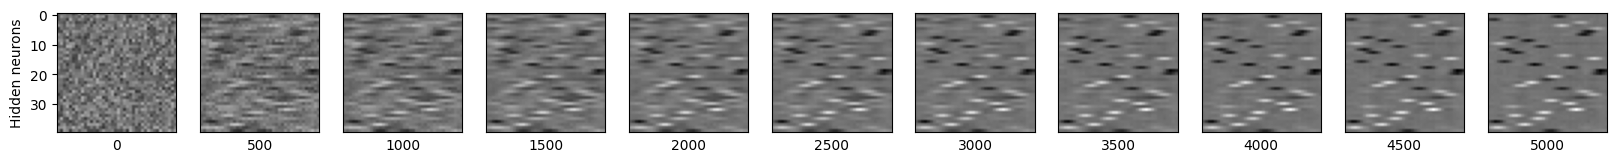

In [3]:
config = config_.copy()
config['num_hiddens'] = 40
config['learning_rate'] = 5.
config['num_epochs'] = 1000
config['use_bias'] = False
config['gain'] = 3

weights, metrics = simulate_or_load(**config)
fig, axs = plot_receptive_fields(weights, num_cols=11, evaluation_interval=500, figsize=(20, 10), reordering_fn=entropy_sort, ind=-1)

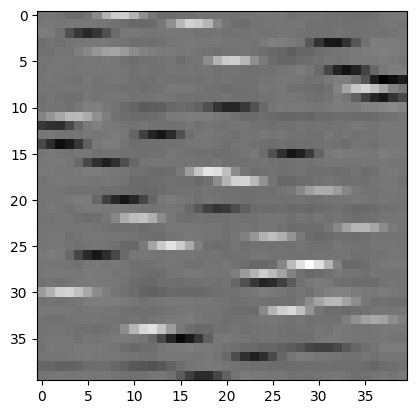

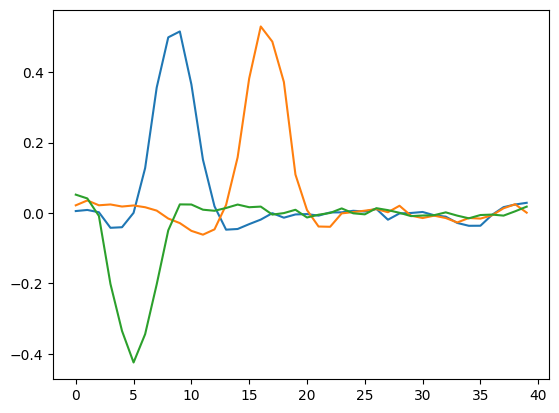

In [4]:
_ = plt.imshow(weights[-1], cmap='gray')
plt.show()
plt.plot(weights[-1][:3].T)

Already simulated


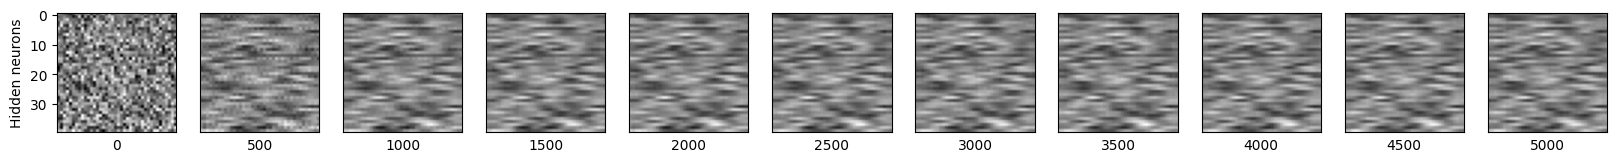

In [5]:
config = config_.copy()
config['num_hiddens'] = 40
config['learning_rate'] = 5.
config['num_epochs'] = 1000
config['use_bias'] = False
config['gain'] = 0.05

weights, metrics = simulate_or_load(**config)
fig, axs = plot_receptive_fields(weights, num_cols=11, evaluation_interval=500, figsize=(20, 10), reordering_fn=entropy_sort, ind=-1)

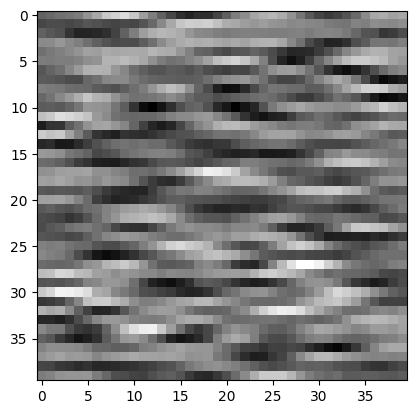

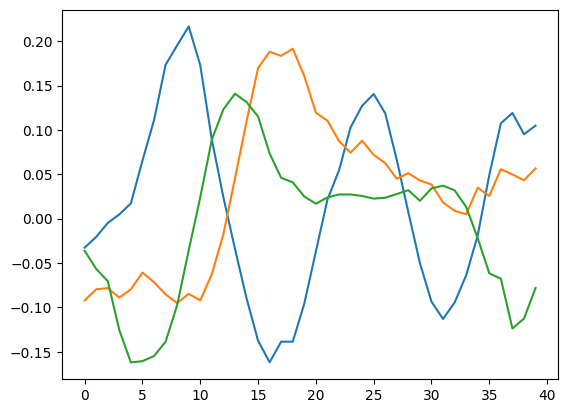

In [6]:
_ = plt.imshow(weights[-1], cmap='gray')
plt.show()
plt.plot(weights[-1][:3].T)

Already simulated


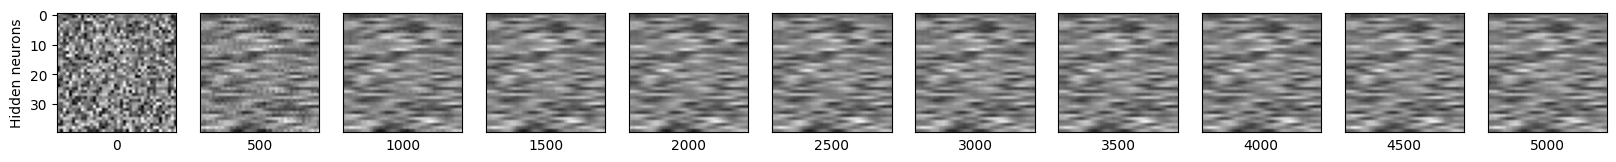

In [7]:
config = config_.copy()
config['num_hiddens'] = 40
config['learning_rate'] = 5.
config['num_epochs'] = 1000
config['use_bias'] = False
config['gain'] = 0.01

weights, metrics = simulate_or_load(**config)
fig, axs = plot_receptive_fields(weights, num_cols=11, evaluation_interval=500, figsize=(20, 10), reordering_fn=entropy_sort, ind=-1)

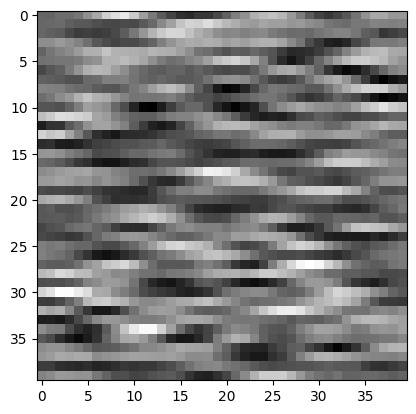

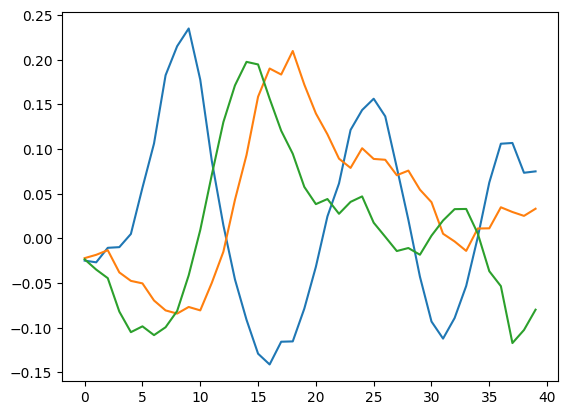

In [8]:
_ = plt.imshow(weights[-1], cmap='gray')
plt.show()
plt.plot(weights[-1][:3].T)

Already simulated


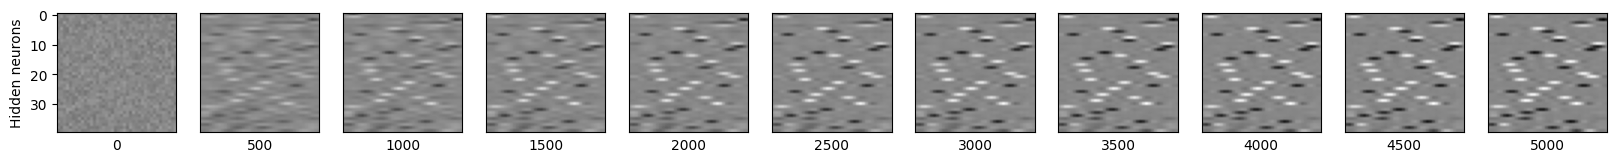

In [9]:
config = config_.copy()
config['num_hiddens'] = 40
config['learning_rate'] = 5.
config['num_epochs'] = 5000
config['use_bias'] = True
config['gain'] = 3

weights, metrics = simulate_or_load(**config)
fig, axs = plot_receptive_fields(weights, num_cols=11, evaluation_interval=500, figsize=(20, 10), reordering_fn=entropy_sort, ind=-1)

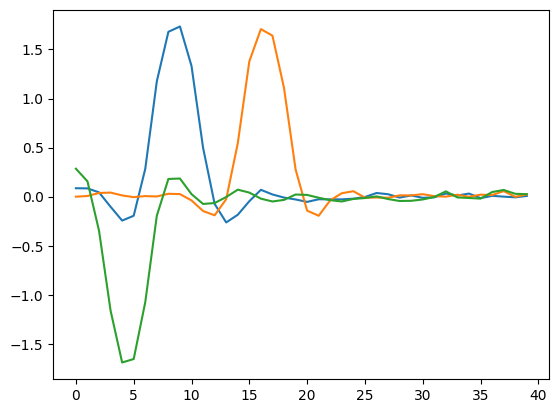

In [10]:
plt.plot(weights[-1][:3].T)

Already simulated


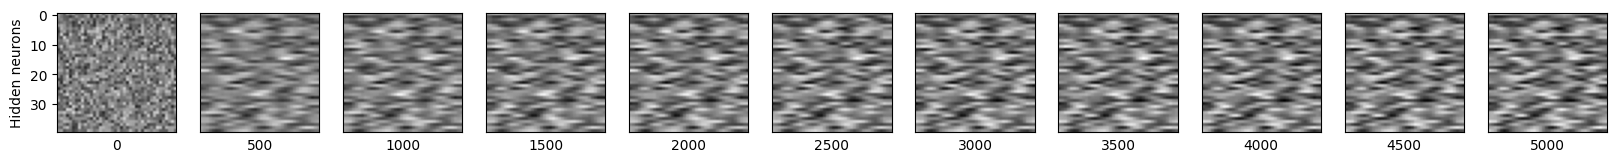

In [11]:
config = config_.copy()
config['num_hiddens'] = 40
config['learning_rate'] = 5.
config['num_epochs'] = 5000
config['use_bias'] = True
config['gain'] = 0.05

weights, metrics = simulate_or_load(**config)
fig, axs = plot_receptive_fields(weights, num_cols=11, evaluation_interval=500, figsize=(20, 10), reordering_fn=entropy_sort, ind=-1)

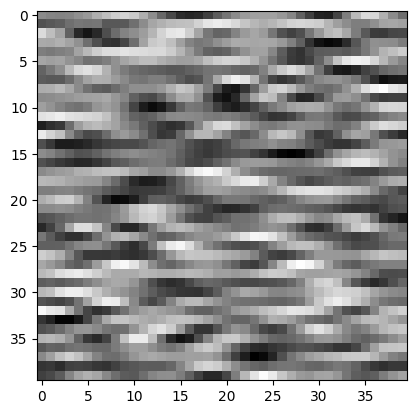

In [12]:
plt.imshow(weights[-1], cmap='gray')

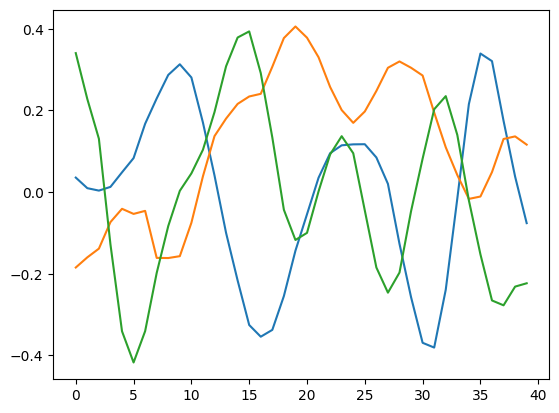

In [13]:
plt.plot(weights[-1][:3].T)

#### K = 1

Already simulated


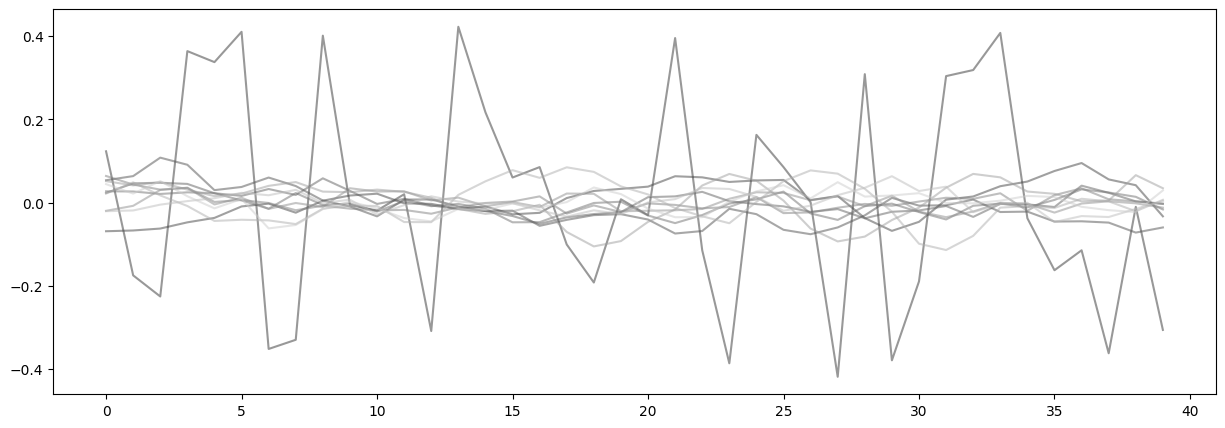

In [14]:
config = config_.copy()
config['num_hiddens'] = 1
config['learning_rate'] = 0.5
config['num_epochs'] = 1000
config['use_bias'] = False
config['gain'] = 0.05

weights, metrics = simulate_or_load(**config)
# fig, axs = plot_receptive_fields(weights, num_cols=11, evaluation_interval=500, figsize=(20, 10), reordering_fn=entropy_sort, ind=-1)
fig, axs = plot_rf_evolution(weights, num_cols=1, num_rows=1)

Already simulated


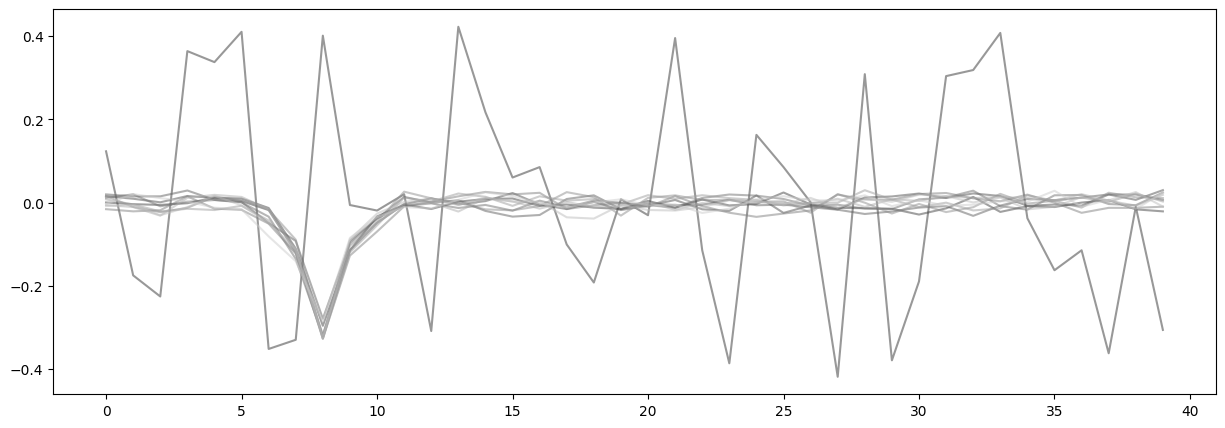

In [15]:
config = config_.copy()
config['num_hiddens'] = 1
config['learning_rate'] = 0.5
config['num_epochs'] = 1000
config['use_bias'] = False
config['gain'] = 3

weights, metrics = simulate_or_load(**config)
# fig, axs = plot_receptive_fields(weights, num_cols=11, evaluation_interval=500, figsize=(20, 10), reordering_fn=entropy_sort, ind=-1)
fig, axs = plot_rf_evolution(weights, num_cols=1, num_rows=1)

### Sigmoid activation

In [16]:
config_ = dict(
  seed=0,
  num_dimensions=40,
  init_scale=1.0,
  model_cls=models.SimpleNet,
  optimizer_fn=optax.sgd,
  batch_size=1000,
  dataset_cls=datasets.NonlinearGPDataset,
  support=(-1, 1),
  class_proportion=0.5,
  sampler_cls=samplers.EpochSampler,
  init_fn=models.xavier_normal_init,
  save_=True,
  xi1=2,
  xi2=1,
  activation='sigmoid',
)

Already simulated


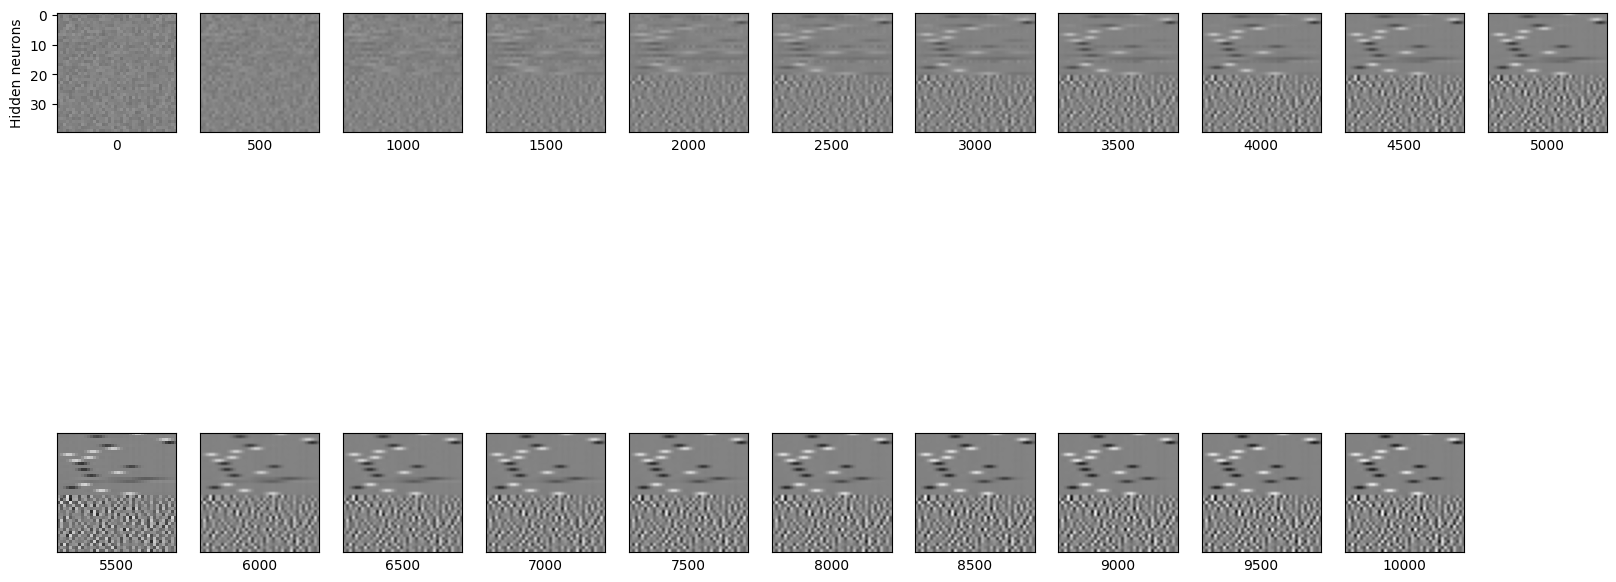

In [17]:
config = config_.copy()
config['num_hiddens'] = 40
config['learning_rate'] = 5.
config['num_epochs'] = 10000
config['use_bias'] = True
config['gain'] = 3

weights, metrics = simulate_or_load(**config)
fig, axs = plot_receptive_fields(weights, num_cols=11, evaluation_interval=500, figsize=(20, 10), reordering_fn=entropy_sort, ind=-1)

Already simulated


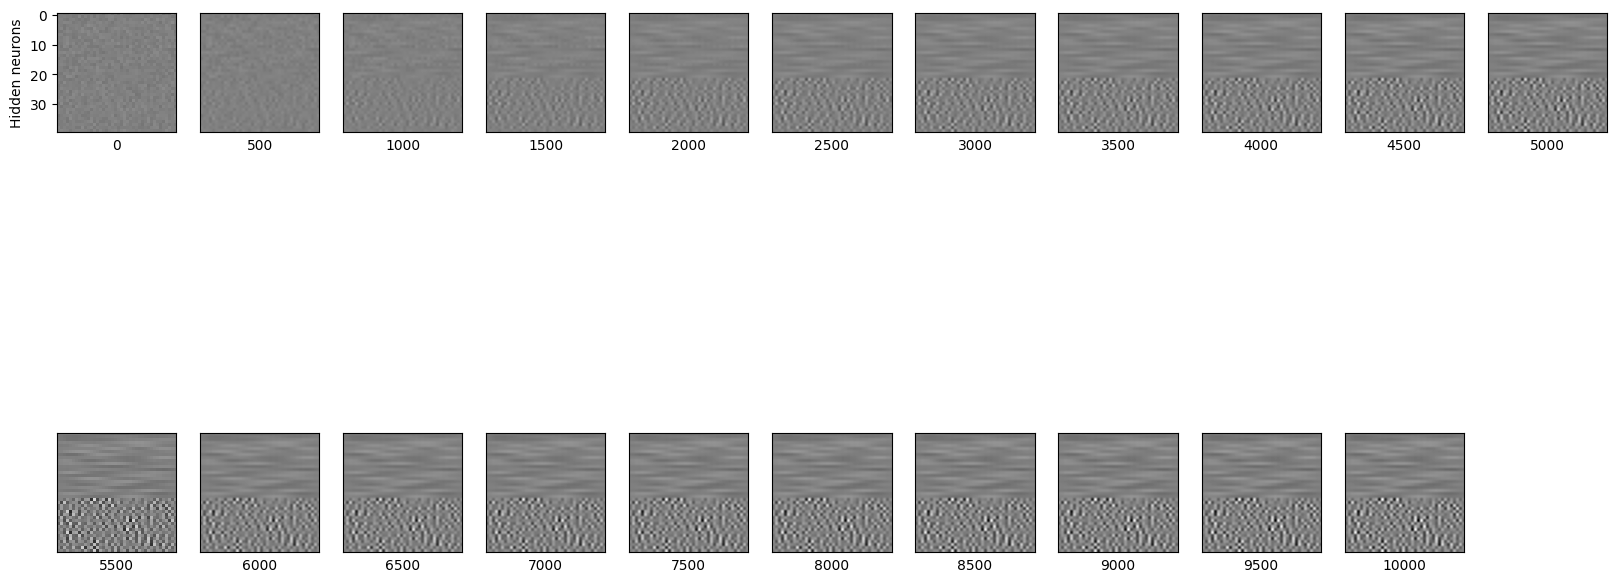

In [18]:
config = config_.copy()
config['num_hiddens'] = 40
config['learning_rate'] = 5.
config['num_epochs'] = 10000
config['use_bias'] = True
config['gain'] = 0.05

weights, metrics = simulate_or_load(**config)
fig, axs = plot_receptive_fields(weights, num_cols=11, evaluation_interval=500, figsize=(20, 10), reordering_fn=entropy_sort, ind=-1)

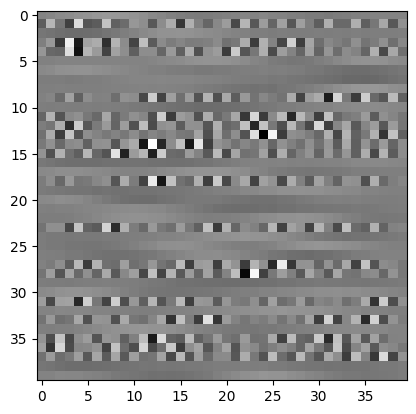

In [19]:
plt.imshow(weights[-1], cmap='gray')

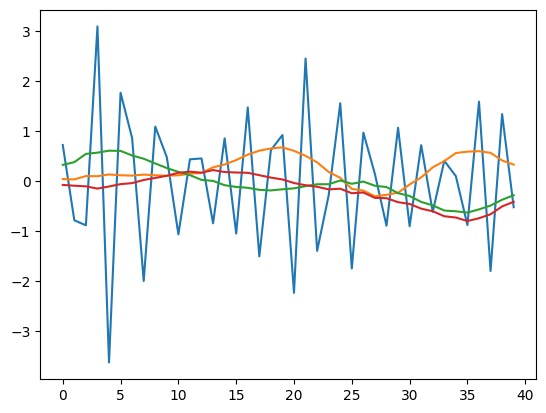

In [20]:
plt.plot(weights[-1][4:8].T)